# CSCE 623 Homework Assignment 1
## Student Name: Mark Demore
## Date: 5 May 2020


In [1]:
"""
HW1
"""

import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

## STEP 1:
load Auto.csv using pandas and preprocess it (handle missing values)

In [2]:
#STEP 1

#STUDENT CODE - insert code to load Auto.csv using pandas and preprocess it (handle missing values)
# store your data in a dataframe called 'data'
#---------------------------------------------    
data = pd.read_csv('Auto.csv', na_values = '?')
data.dropna(inplace=True)
#---------------------------------------------    


#show the dataset was loaded by displaying first few rows
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## STEP 2:
Explore the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


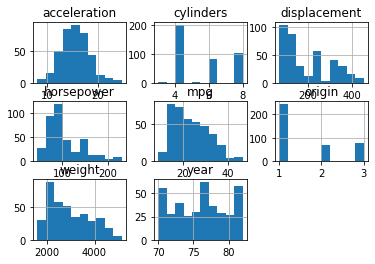

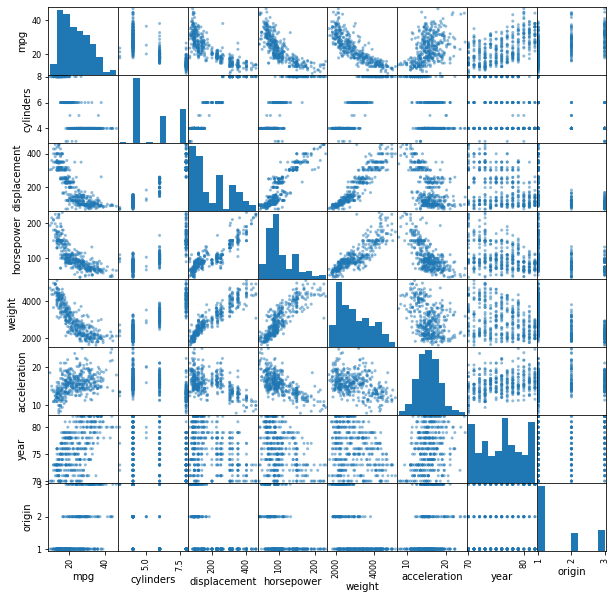

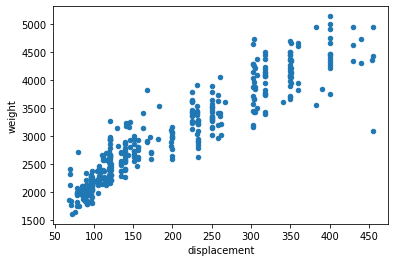

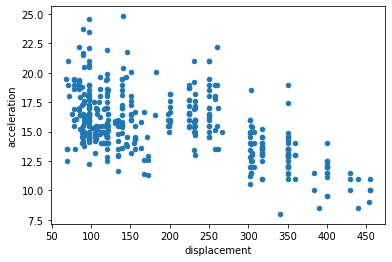

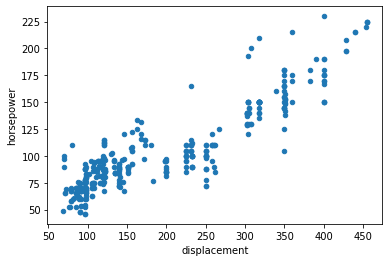

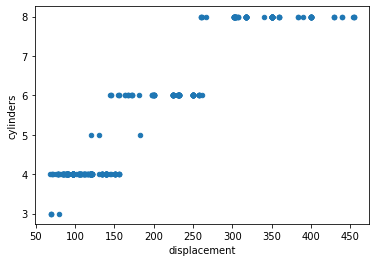

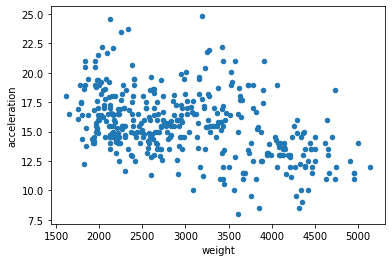

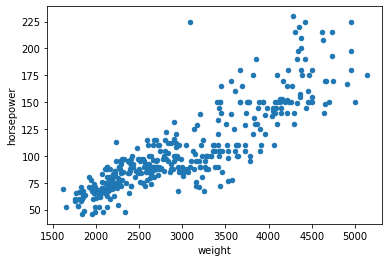

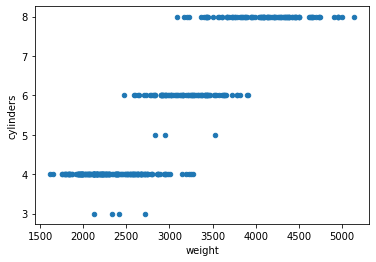

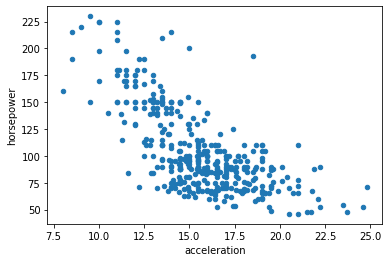

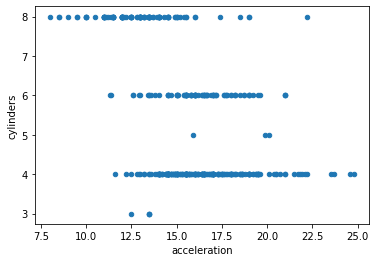

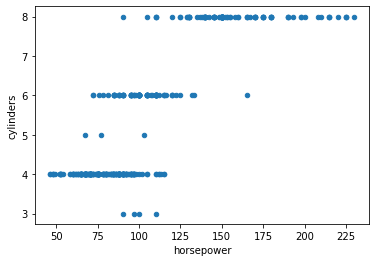

In [3]:
#STEP 2

#STUDENT CODE - Insert code to explore the dataset here
#---------------------------------------------          
data.info()
data.hist()
scatter_matrix(data, figsize = (10,10))

data.plot.scatter('displacement', 'weight')
data.plot.scatter('displacement', 'acceleration')
data.plot.scatter('displacement', 'horsepower')
data.plot.scatter('displacement', 'cylinders')
data.plot.scatter('weight', 'acceleration')
data.plot.scatter('weight', 'horsepower')
data.plot.scatter('weight', 'cylinders')
data.plot.scatter('acceleration','horsepower')
data.plot.scatter('acceleration', 'cylinders')
data.plot.scatter('horsepower','cylinders')
#---------------------------------------------      

a. Dataset stats: 
    9 features
    397 observations


b. Feature descriptions:
    acceleration: normal
    cylinders: multi modal
    displacement: poisson
    horsepower: poisson
    mpg: poisson
    origin: multi modal
    weight: poisson
    year: multi modal
 

c. Feature relationships:
    Strong correlation:
        displacement / weight
        displacement / horsepower
        horsepower / weight
        horsepower / acceleration
    Mild correlation:
        displacement / acceleration
        acceleration / weight
    Weak correlation:
        cylinders/horsepower
        cylinders / acceleration
        cylinders / displacement
        cylinders / weight
        
 

## STEP 3:
Make a single scatterplot of horsepower (x axis) by MPG (y axis)

Insert the value of beta1guess based on eyeballing the graph

Guess for $\beta_1$ = -2.000000

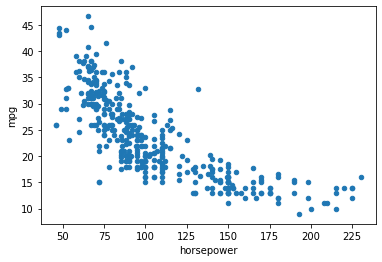

In [4]:
#STEP 3:

beta0 = 40.

#STUDENT CODE - Make a single scatterplot of horsepower (x axis) by MPG (y axis) 
# Insert the value of beta1guess based on eyeballing the graph
#---------------------------------------------  
data.plot.scatter('horsepower','mpg')

beta1guess = -2.0 #change 0.0 to be your guess for beta
#--------------------------------------------- 

md(r"Guess for $\beta_1$ = %f" %beta1guess)

## STEP 4:
Make a `numpy` array of possible $\beta_1$ values(`beta1bracket`) surrounding your guess $\beta_1$ for to test & display the values you chose

In [5]:
#STEP 4

#STUDENT CODE - Insert code to make a set of possible beta1 values to test & display the values you chose
#---------------------------------------------          
beta1bracket = np.linspace(0.0,-0.5,num=50)
#--------------------------------------------- 



## STEP 5:
Compute the sum of squared residual errors (RSS) under each possible beta1bracket member

In [6]:
#STEP 5

#STUDENT CODE - Insert code to compute the sum of squared residual errors (RSS) under each possible beta1bracket member.
#---------------------------------------------
def rss1d(beta0,beta1,x,y):
    beta = np.array([[beta0,beta1]]).T
    X = np.array([np.ones(x.shape[0]),x]).T
    yhat = np.squeeze(np.dot(X,beta)) # squeeze to get dimensions to work together correctly
    residuals = y-yhat
    rss = np.dot(residuals.T, residuals)
    return rss

rssbracket = np.array([])

for beta1 in beta1bracket:
    rssbracket = np.append(rssbracket,rss1d(beta0,beta1,data.horsepower,data.mpg))
    
#--------------------------------------------- 

## STEP 6:
Make a new plot of $\beta_1$ values on the x axis and RSS cost on the y axis (computed in step 5). 
Label your axes and use math fonts in your labels 

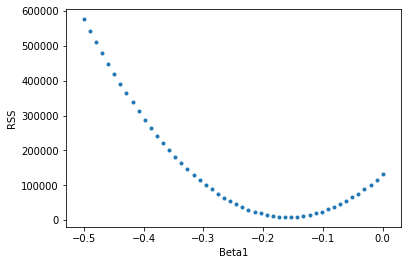

In [7]:
#STEP 6

#STUDENT CODE - make a new plot of beta_1 values on the x axis and RSS cost on the y axis (computed in step 5). 
#label your axes and use math fonts in your labels if possible
#---------------------------------------------          
    
plt.scatter(beta1bracket,rssbracket, marker='.')
plt.xlabel('Beta1')
plt.ylabel('RSS')
plt.show()
beta1min = beta1bracket[np.argmin(rssbracket)]
#--------------------------------------------- 

# STEP 7:   
Describe the RSS Plot

## Student Answers

### What is the shape of the plot in step 6?  
A bowl


### Using the plot, how might someone find the best value of $\beta_1$:  
gradient descent, min rss val

### Select & report value of $\beta_1$ you think will have the best fit (you may want to improve your estimate by exploring near it by adding additional values for $\beta_1$  and repeat steps 3-5):  
somewhere around -0.15




## STEP 8:
Build a new scatterplot with horsepower(x axis) vs MPG (y axis)

Add a line to the plot - the linear regression line implied by the fixed beta0=40 and your best choice for beta1

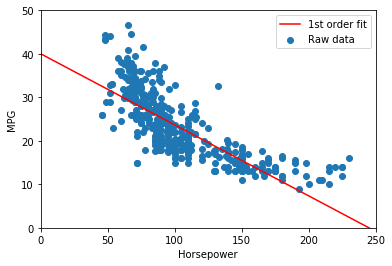

In [8]:
#STEP 8

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the fixed beta0=40 and your best choice for beta1 
#---------------------------------------------
plt.scatter(data.horsepower,data.mpg,label='Raw data')
plot_x = np.arange(0,250,1)
yhat = beta0+beta1min*plot_x
plt.plot(plot_x,yhat,'-r',label='1st order fit')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

#--------------------------------------------- 


## STEP 9:
Implement equation 3.4 on page 62 to develop the closed-form function `computeBetas(xVec, yVec)` 
which accepts a column vector of x values and a column vector of y values and returns betas, 
which is a structure containing the values for the 2 coefficients $\beta_0$ and $\beta_1$  

In [9]:
#STEP 9

#STUDENT CODE - In code, implement equation 3.4 on page 62 to develop the closed-form function computeBetas(xVec, yVec) 
# which accepts a column vector of x values and a column vector of y values and returns betas, 
# which is a structure containing the values for the 2 coefficients beta0 and beta1  
#---------------------------------------------          
def computeBetas(xVec, yVec):
    if len(xVec.shape)==1: # need to expand dims if shape of form (n,)
        xVec = np.expand_dims(xVec,1)
        
    if  not np.allclose(np.ones((xVec.shape[0],1)),xVec[:,0]): # check if there is already a column of ones in front
        xVec = np.hstack([np.ones((xVec.shape[0],1)),xVec])
        
    XpX = np.dot(xVec.T,xVec) # X'X
    XpY = np.dot(xVec.T,yVec) # X'Y
    
    return np.dot(np.linalg.inv(XpX),XpY) # b=(X'X)^-1(X'Y)

#--------------------------------------------- 

## STEP 10:
Compute and display best $\beta_0$ (`beta0best`) and $\beta_1$ (`beta1best`) for the Auto Dataset by calling the closed-form function in step 9

In [10]:
#STEP 10
#STUDENT CODE - Compute beta0best and beta1best for the Auto Dataset by calling the closed-form function in step 9
#--------------------------------------------- 
betas = computeBetas(data.horsepower, data.mpg)
display(md(r'Best $\beta_0=$ %f' %betas[0]))
display(md(r'Best $\beta_1=$ %f' %betas[1]))

#--------------------------------------------- 

Best $\beta_0=$ 39.935861

Best $\beta_1=$ -0.157845

## STEP 11:

### Student Answer

#### How does the closed form computed value of $\beta_1$ compare with your estimate of $\beta_1$ from step 6?   Discuss: 
Just more decimal specificity


## STEP 12:
Build a new scatterplot with horsepower(x axis) vs MPG (y axis), then add a line to the plot - the linear regression line implied by the $\beta_0$ and $\beta_1$ you determined in step 10

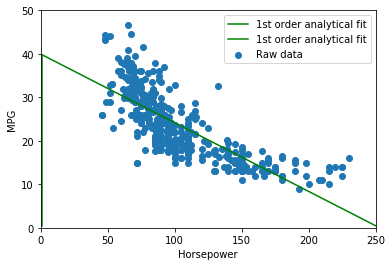

In [11]:
#STEP 12

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the beta0 and beta1 you determined in step 10 
#---------------------------------------------          
x_plot = np.vstack((np.ones(250),np.linspace(1,250,num=250))).T
yhat = np.dot(x_plot,betas)
plt.scatter(data.horsepower, data.mpg, label='Raw data')
plt.plot(x_plot, yhat, '-g', label='1st order analytical fit')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show();
#--------------------------------------------- 

## STEP 13:
Use sklearn's linear model function to fit a linar model from horsepower to mpg. Then display the coefficients, MSE and explained variance score.

In [12]:
#STEP13

#STUDENT CODE - Use sklearn's linear model function to fit a linar model from horsepower to mpg. 
# also, display the coefficients, MSE and explained variance score
#---------------------------------------------          
mpg_hp_model = linear_model.LinearRegression()
X = data.horsepower.values.reshape(-1,1)
mpg_hp_model.fit(X, data.mpg)

display(md(r'$\beta_0 =$ %f' %mpg_hp_model.intercept_))
display(md(r'$\beta_1 =$ %f' %mpg_hp_model.coef_))
display(md(r'$R^2 =$ %f' %mpg_hp_model.score(X, data.mpg)))
yhat = mpg_hp_model.predict(X)
display(md(r'$MSE =$ %f' %mean_squared_error(data.mpg, yhat)))

#--------------------------------------------- 

$\beta_0 =$ 39.935861

$\beta_1 =$ -0.157845

$R^2 =$ 0.605948

$MSE =$ 23.943663

## STEP 14:
Build a new scatterplot with horsepower(x axis) vs MPG (y axis), then add a line to the plot - the linear regression line implied by the sklearn model determined in step 13

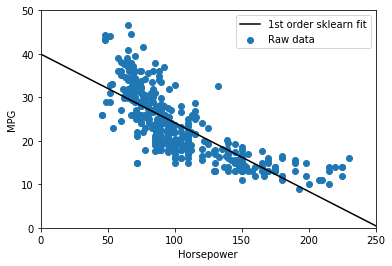

In [13]:
#STEP 14

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the sklearn model determined in step 13 
#---------------------------------------------          
X_plot = np.linspace(1,250,num=250).reshape(-1,1)
yhat = mpg_hp_model.predict(X_plot)

plt.scatter(data.horsepower, data.mpg, label='Raw data')
plt.plot(X_plot, yhat, '-k', label='1st order sklearn fit')
plt.xlim([0,250])
plt.ylim([0,50])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show();

#--------------------------------------------- 

## STEP 15a:
Compute the residual errors in predicting mpg from horsepower.  Plot these residual errors as a function of horsepower using a scatterplot.  Add a horizontal line at y=0 to indicate the zero-error position.

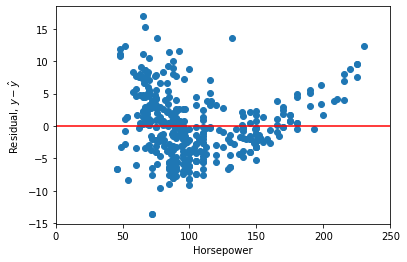

In [14]:
#STUDENT CODE

#---------------------------------------------  
yhat = mpg_hp_model.predict(data.horsepower.values.reshape(-1,1))
residuals = data.mpg - yhat

plt.scatter(data.horsepower, residuals)
plt.hlines(0,0,250, color='r')
plt.xlim([0,250])
plt.xlabel('Horsepower')
plt.ylabel(r'Residual, $y-\hat{y}$');


#---------------------------------------------      

## STEP 15b

### Describe the plot - particularly the trends.  

### Do the errors appear well-distributed, or are there trends?  

### If there are trends: 

> 
1. Describe the trends,  
1. Explain what these trends indicate about the ability to predict mpg from horsepower using a linear model, 
1. Give at least one course of action you could take to make a better model.